In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# compress dim by using tSNE
from sklearn.manifold import TSNE
plt.style.use('default')

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
# def display_digit(x_train, y_train, num):
#     label = y_train[num].argmax(axis=0)
#     image = x_train[num].reshape([28,28])
#     plt.title('Example: %d  Label: %d' % (num, label))
#     plt.imshow(image, cmap=plt.get_cmap('gray_r'))
#     plt.show()


In [0]:
LEARNING_RATE = 0.01

is_training = True

initializer = tf.contrib.layers.variance_scaling_initializer()

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

l1 = tf.layers.dense(x, units=1024,  activation=tf.nn.relu6, kernel_initializer=initializer)
l2 = tf.layers.dense(l1, units=1024, activation=tf.nn.selu, kernel_initializer=initializer)
l3 = tf.layers.dropout(l2, rate=0.1, training=is_training)
l4 = tf.layers.dense(l3, units=1024,  activation=tf.nn.relu6)
l5 = tf.layers.dense(l4, units=1024,  activation=tf.nn.selu)
l6 = tf.layers.dropout(l5, rate=0.1, training=is_training)
l7 = tf.layers.dense(l6, units=1024,  activation=tf.nn.selu)
l8 = tf.layers.dense(l7, units=10)
y  = tf.nn.softmax(l8)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
# train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess=tf.Session()
tf.global_variables_initializer().run(session=sess)




In [17]:
TRAIN_STEPS = 60000

for i in range(TRAIN_STEPS+1):
    batch = mnist.train.next_batch(100)
    _, loss_value = sess.run((train_step, loss), feed_dict={x: batch[0], y_: batch[1]})
    if i%1000 == 0:
        is_training = False
        print('Training Step:' + str(i) + '  Accuracy =  ' + 
              str(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})) + 
              '  Loss =  ' + str(loss_value))
        is_training = True
                        

Training Step:0  Accuracy =  0.0973  Loss =  2.3100648
Training Step:1000  Accuracy =  0.9114  Loss =  1.5915766
Training Step:2000  Accuracy =  0.9283  Loss =  1.5272499
Training Step:3000  Accuracy =  0.9385  Loss =  1.5129132
Training Step:4000  Accuracy =  0.943  Loss =  1.5161488
Training Step:5000  Accuracy =  0.9461  Loss =  1.5020939
Training Step:6000  Accuracy =  0.9482  Loss =  1.4922202
Training Step:7000  Accuracy =  0.9538  Loss =  1.5073112
Training Step:8000  Accuracy =  0.9547  Loss =  1.4874703
Training Step:9000  Accuracy =  0.9571  Loss =  1.5055449
Training Step:10000  Accuracy =  0.9589  Loss =  1.5127395
Training Step:11000  Accuracy =  0.9597  Loss =  1.4793785
Training Step:12000  Accuracy =  0.9633  Loss =  1.5150657
Training Step:13000  Accuracy =  0.9635  Loss =  1.4891994
Training Step:14000  Accuracy =  0.9641  Loss =  1.5451351
Training Step:15000  Accuracy =  0.9664  Loss =  1.494254
Training Step:16000  Accuracy =  0.9665  Loss =  1.4780045
Training Ste

In [0]:
# Feed the 1000 test data to graph

IS_LEARNING = False

examples = mnist.test.next_batch(1000)
images = examples[0]
labels = examples[1]
y_output = sess.run(y, feed_dict={x: examples[0], y_: examples[1]})
y_info = np.hstack((images, y_output))

print(y_info.shape)


(1000, 794)


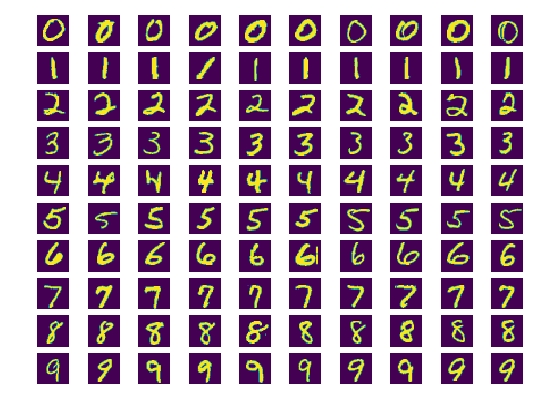

In [0]:
# The output (softmax) layer result
for i in range(10):
    y_info = y_info[y_info[:,784+i].argsort()][::-1]
    for j in range(10):    
        ax=plt.subplot2grid((10, 10), (i, j))
        ax.imshow(y_info[j][0:784].reshape(28,28))
        plt.axis('off')



Layer 1 - Dim [ 30  38 102 409 615 744 756 800 954 955] 
Layer 2 - Dim [411 445 564 659 796 807 819 892 993 996] 
Layer 3 - Dim [ 276  301  386  619  620  639  658  715  914 1010] 
Layer 4 - Dim [185 251 275 279 373 463 540 834 860 870] 
Layer 5 - Dim [ 29  34  56 123 174 356 567 776 868 892] 


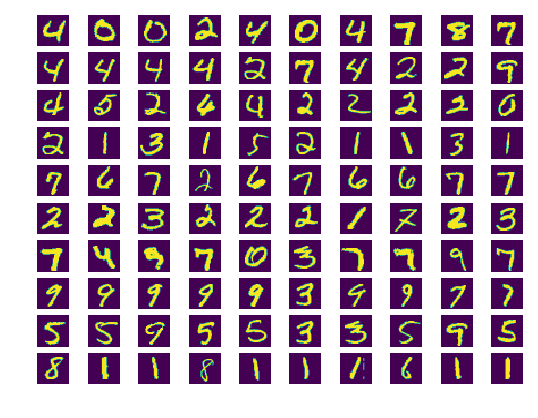

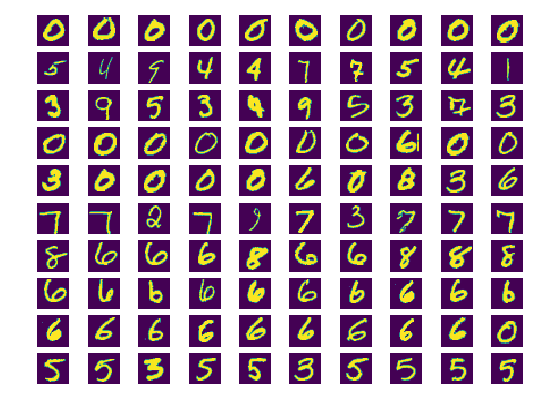

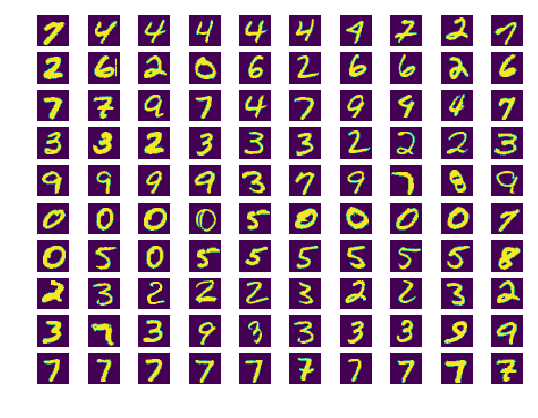

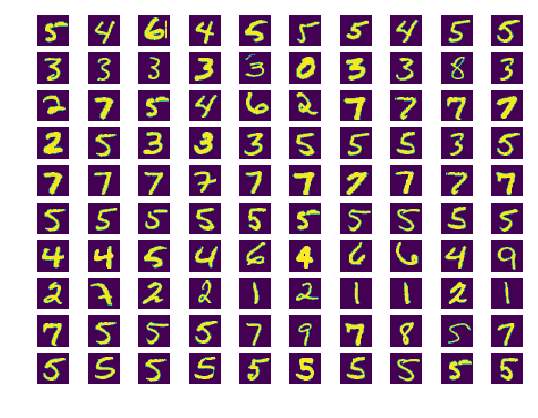

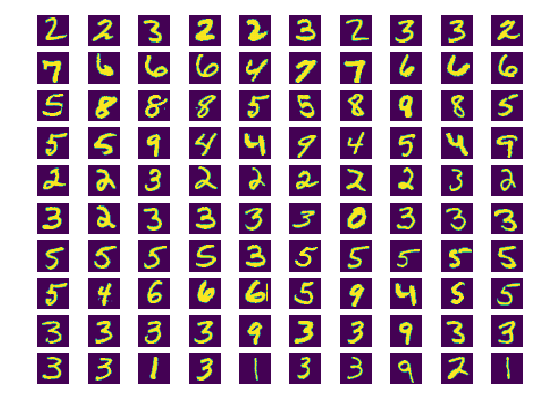

In [0]:
# get 1, 2, 3, 4, 5, layer output
num_unit_per_layer = 1024

(l1_out, l2_out, l3_out, l4_out, l5_out) = sess.run((l1, l2, l4, l5, l7), feed_dict={x: examples[0], y_: examples[1]})

# print(l1_output.shape, l3_output.shape)

layers_info = np.hstack((images, l1_out, l2_out, l3_out, l4_out, l5_out))

for layer_num in range(5):
    random_dims = np.arange(num_unit_per_layer)
    np.random.shuffle(random_dims)
    random_dims = random_dims[:10]
    random_dims.sort()
    plt.figure()
    for i in range(10):

        target = 784 + (layer_num)*num_unit_per_layer + random_dims[i]
        layers_info = layers_info[layers_info[:,target].argsort()][::-1]
        for j in range(10):    
            if layers_info[j][target] == 0:
                ax=plt.subplot2grid((10, 10), (i, j))
                plt.axis('off')
                break            
            ax=plt.subplot2grid((10, 10), (i, j))
            ax.imshow(layers_info[j][0:784].reshape(28,28))
            plt.axis('off')
            
    print('Layer ' + str(layer_num+1) + ' - Dim ' + str(random_dims) + ' ')




Actually, I barely see any pattern based on this result.

The number 0, 2, 3, 4, 6, 7 seems can be grouped together easily, while others are mixed together.

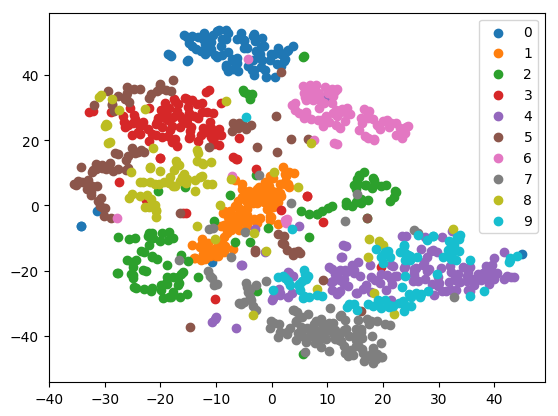

In [0]:
# compress dim by using tSNE
images_embedded = TSNE(n_components=2).fit_transform(images)
# zip with label 
images_embedded_with_label = np.hstack((images_embedded, labels))
# print(images_embedded.shape)
# print(images_embedded_with_label.shape)

# draw picture based on category
plt.figure()
for i in range(10):
    images_digits = images_embedded_with_label[np.where(images_embedded_with_label[:,2+i] == 1)]
    x = images_digits[:,0]
    y = images_digits[:,1] 
    plt.scatter(x, y, label=str(i))
plt.legend()

We can see the cluster in the pitcure. 
For example, number 0, number 6, number 1, number 7, number 2.

However, for number 3, 5, they are mixed with each other. 

It happens to 4 and 9 as well. 

Number 8 is the most complex one, it is scattered to a large area and connect to several numbers.

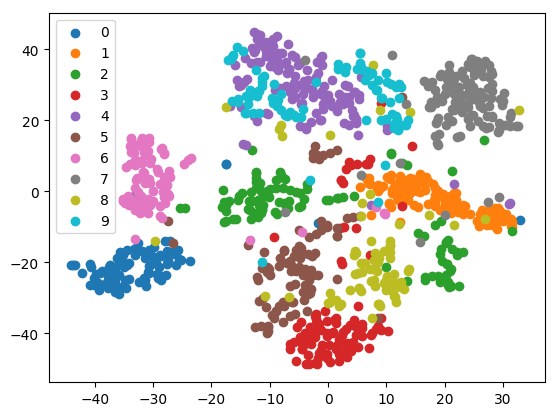

In [0]:
# The first layer output
l1_embedded = TSNE(n_components=2).fit_transform(l1_out)
l1_embedded_with_label = np.hstack((l1_embedded, labels))
plt.figure()
for i in range(10):
    images_digits = l1_embedded_with_label[np.where(l1_embedded_with_label[:,2+i] == 1)]
    x = images_digits[:,0]
    y = images_digits[:,1] 
    plt.scatter(x, y, label=str(i))
plt.legend()

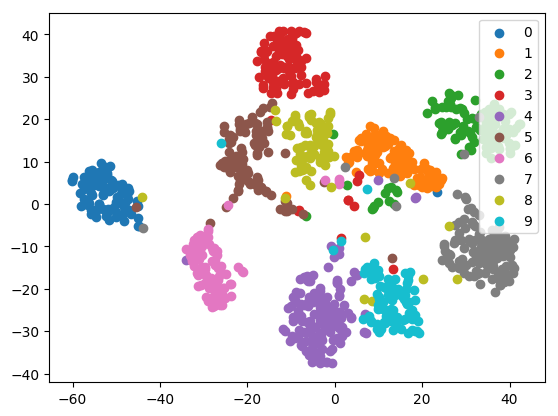

In [0]:
# The second layer output
l2_embedded = TSNE(n_components=2).fit_transform(l2_out)
l2_embedded_with_label = np.hstack((l2_embedded, labels))
plt.figure()
for i in range(10):
    images_digits = l2_embedded_with_label[np.where(l2_embedded_with_label[:,2+i] == 1)]
    x = images_digits[:,0]
    y = images_digits[:,1] 
    plt.scatter(x, y, label=str(i))
plt.legend()

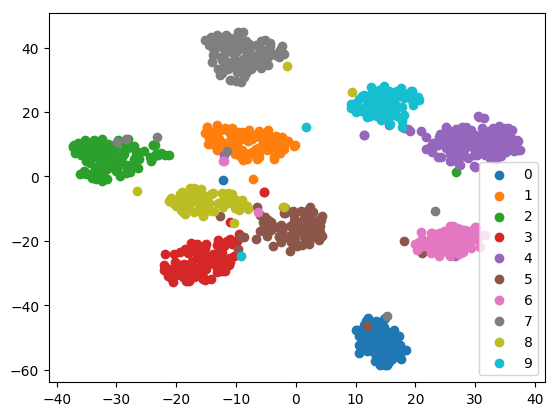

In [0]:
# The third layer output
l3_embedded = TSNE(n_components=2).fit_transform(l3_out)
l3_embedded_with_label = np.hstack((l3_embedded, labels))
plt.figure()
for i in range(10):
    images_digits = l3_embedded_with_label[np.where(l3_embedded_with_label[:,2+i] == 1)]
    x = images_digits[:,0]
    y = images_digits[:,1] 
    plt.scatter(x, y, label=str(i))
plt.legend()

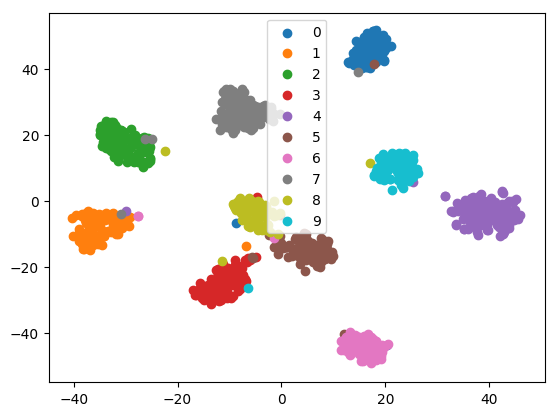

In [0]:
# The fourth layer output
l4_embedded = TSNE(n_components=2).fit_transform(l4_out)
l4_embedded_with_label = np.hstack((l4_embedded, labels))
plt.figure()
for i in range(10):
    images_digits = l4_embedded_with_label[np.where(l4_embedded_with_label[:,2+i] == 1)]
    x = images_digits[:,0]
    y = images_digits[:,1] 
    plt.scatter(x, y, label=str(i))
plt.legend()

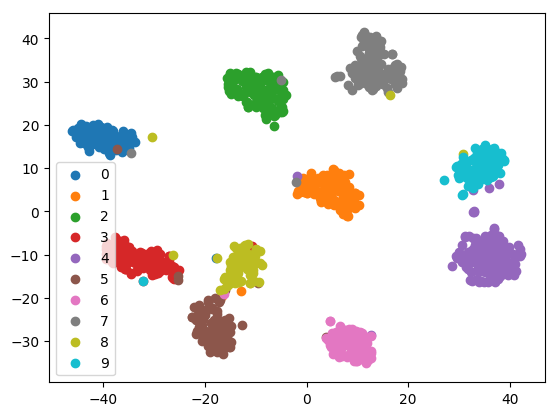

In [0]:
# The fiveth layer output
l5_embedded = TSNE(n_components=2).fit_transform(l5_out)
l5_embedded_with_label = np.hstack((l5_embedded, labels))
plt.figure()
for i in range(10):
    images_digits = l5_embedded_with_label[np.where(l5_embedded_with_label[:,2+i] == 1)]
    x = images_digits[:,0]
    y = images_digits[:,1] 
    plt.scatter(x, y, label=str(i))
plt.legend()

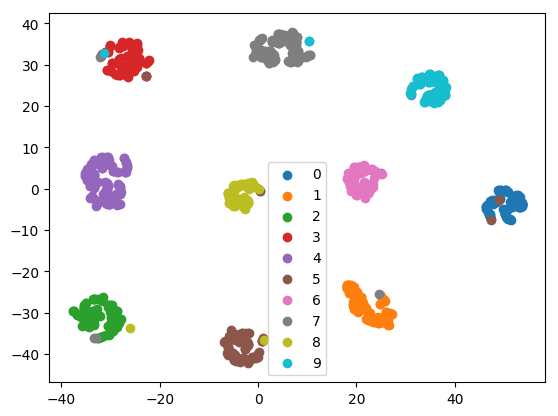

In [0]:
# The y layer output
y_embedded = TSNE(n_components=2).fit_transform(y_output)
y_embedded_with_label = np.hstack((y_embedded, labels))
plt.figure()
for i in range(10):
    images_digits = y_embedded_with_label[np.where(y_embedded_with_label[:,2+i] == 1)]
    x = images_digits[:,0]
    y = images_digits[:,1] 
    plt.scatter(x, y, label=str(i))
plt.legend()

In the first layer, we can see all numbers still mixed with each others, but we can see that some clusters are formed.

In the second layer, all numbers start to "condense" to it's own clusters. Nevertheless, clusters are quite closed to each others, sometime it is hard to say a node is close to which clusters. In addition, there are several dots are scattered in the middle. I guess those dots are that hard to classified.

In the third layer, clusters are begin to move away from each other. However, we can see number 3, 5, 8 clusters still pretty close. Moreover, several dots still wander outside the clusters.

In the fourth layer, we don't see too much dots wander outside the clusters. Nevertheless, we still see clusters 3, 5, 8  close to each others and lots of misclassified dots are between them.

In the fiveth layer, only 5 and 8 clusters are connected, and cluster 3 is successfully seprated from a "chaos" region. 

In the output layer, we can see all the number is almost seprate and group perfectly, even there are still some number are misclassified. Moreover, those clusters has very high cohesion. That is, the region they occupies are quite small.


# Part 2


In [19]:
# In Google Colaborary
from google.colab import files
train_clean_male_wav = files.upload() # train_clean_male.wav
train_dirty_male_wav = files.upload() # train_clean_male.wav





Saving train_clean_male.wav to train_clean_male.wav


Saving train_dirty_male.wav to train_dirty_male.wav


In [0]:
import librosa
import math

# Load data 
s, sr_s=librosa.load('train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr_x=librosa.load('train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)
S_abs = np.abs(S)
X_abs = np.abs(X)

In [0]:
# Build NN

LEARNING_RATE = 1e-3
BATCH_SIZE = 50

initializer = tf.contrib.layers.variance_scaling_initializer()

x = tf.placeholder(tf.float32, [None, 513])
y_ = tf.placeholder(tf.float32, [None, 513])

l1 = tf.layers.dense(x, units=200,  activation=tf.nn.relu6, kernel_initializer=initializer)
l2 = tf.layers.dense(l1, units=200,  activation=tf.nn.selu, kernel_initializer=initializer)
l3 = tf.layers.dense(l2, units=200,  activation=tf.nn.relu6)
y = tf.layers.dense(l3, units=513, activation=tf.nn.selu)

loss = tf.losses.mean_pairwise_squared_error(labels=y_, predictions=y)
train_step = tf.train.GradientDescentOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

sess=tf.Session()
tf.global_variables_initializer().run(session=sess)

train_data = tf.data.Dataset.from_tensor_slices(tf.constant(X_abs.T[:]))
label_data = tf.data.Dataset.from_tensor_slices(tf.constant(S_abs.T[:]))
zip_data = tf.data.Dataset.zip((train_data, label_data))

batch_data = zip_data.batch(BATCH_SIZE)
batch_data = batch_data.repeat()
iterator = batch_data.make_one_shot_iterator()
next_batch = iterator.get_next()


In [30]:
# Training

TRAIN_STEPS = 100000
for i in range(TRAIN_STEPS+1):
    batch = sess.run(next_batch)
    _, loss_value = sess.run((train_step, loss), feed_dict={x: batch[0], y_: batch[1]})
    if i% 5000 == 0:
        print('Training Step:' + str(i) + '  Loss =  ' + str(loss_value))



Training Step:0  Loss =  20.327492
Training Step:5000  Loss =  4.1058955
Training Step:10000  Loss =  2.9065332
Training Step:15000  Loss =  2.3606167
Training Step:20000  Loss =  2.0689065
Training Step:25000  Loss =  1.863378
Training Step:30000  Loss =  1.6896132
Training Step:35000  Loss =  1.5481837
Training Step:40000  Loss =  1.4341849
Training Step:45000  Loss =  1.3400562
Training Step:50000  Loss =  1.261031
Training Step:55000  Loss =  1.1913776
Training Step:60000  Loss =  1.126548
Training Step:65000  Loss =  1.0700547
Training Step:70000  Loss =  1.0198679
Training Step:75000  Loss =  0.97471166
Training Step:80000  Loss =  0.9343194
Training Step:85000  Loss =  0.8973794
Training Step:90000  Loss =  0.8640745
Training Step:95000  Loss =  0.8341726
Training Step:100000  Loss =  0.8074499


In [0]:
def denoise_sound(input_file_name, output_file_name):
    sn, sr=librosa.load(input_file_name, sr=None)
    testX=librosa.stft(sn, n_fft=1024, hop_length=512)
    testX_abs = np.abs(testX)
    S_test_abs = sess.run(y, feed_dict={x: testX_abs.T}).T
    ratio = (testX / testX_abs)
    Sh = np.multiply(ratio, S_test_abs)
    librosa.output.write_wav(output_file_name, librosa.istft(Sh, hop_length=512), sr)

In [27]:
# Load test data to Google Colaborary
test_x_01 = files.upload() # test_x_01.wav
test_x_02 = files.upload() # test_x_02.wav




Saving test_x_01.wav to test_x_01.wav


Saving test_x_02.wav to test_x_02.wav


In [0]:
# Recover sound track
denoise_sound('test_x_01.wav', 'recover_01.wav')
denoise_sound('test_x_02.wav', 'recover_02.wav')



# Download denoise wav to local machine

files.download('recover_01.wav')
files.download('recover_02.wav')
